In [267]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn import metrics
from math import fabs

In [268]:
n= 100
x=np.random.randint(1,50,n)
y=np.random.randint(1,50,n)

In [269]:
x_c = np.mean(x)
y_c = np.mean(y)

In [270]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [271]:
def clust(x, y, x_cc, y_cc, k):
    cluster = []
    for i in range(0, n):
        d = dist(x[i], y[i], x_cc[0], y_cc[0])
        numb = 0
        for j in range(0, k):
            if dist(x[i], y[i], x_cc[j], y_cc[j]) < d:
                d = dist(x[i], y[i], x_cc[j], y_cc[j])
                numb = j
        cluster.append(numb)
    return cluster

In [272]:
def calculate_center_of_mass(cluster, x, y, k):
    center_of_mass_x = [0 for i in range(k)]
    center_of_mass_y = [0 for i in range(k)]
    count = [0 for i in range(k)]

    for i in cluster:
        count[i] += 1

    number = 0
    for i in cluster:
        center_of_mass_x[i] += x[number] / count[i]
        center_of_mass_y[i] += y[number] / count[i]
        number += 1

    return [center_of_mass_x, center_of_mass_y]

In [273]:
R=0
for i in range(0,n):
    if(dist(x_c,y_c,x[i],y[i])>R):
        R=dist(x_c,y_c,x[i],y[i])

In [274]:
def clusterSum(k,x_cc,y_cc,cluster):
    for i in range(0,k):
        result=0
        for j in range(0,len(cluster)):
            if(cluster[j]==i):
                result+=dist(x[j],y[j],x_cc[i],y_cc[i])**2
    return result

In [275]:
k_values = [];

In [276]:
for k in K:
    x_cc = [R * np.cos(2 * np.pi * i / k) + x_c for i in range(k)]
    y_cc = [R * np.sin(2 * np.pi * i / k) + x_c for i in range(k)]

    cluster = clust(x, y, x_cc, y_cc, k)

    center_of_mass = calculate_center_of_mass(cluster, x, y, k)
    changed = False
    while not changed:
        new_cluster = clust(x, y, center_of_mass[0], center_of_mass[1], k)
        if np.array_equal(new_cluster, cluster):
            change = True
            print(k)
            k_values.append(clusterSum(k,x_cc,y_cc,cluster))
            print(k_values)
            break

        cluster = new_cluster

        center_of_mass = calculate_center_of_mass(cluster, x, y, k)

1
[152915.83999999997]
2
[152915.83999999997, 34075.105832963316]
3
[152915.83999999997, 34075.105832963316, 16276.96850910259]
4
[152915.83999999997, 34075.105832963316, 16276.96850910259, 9574.66949432018]
5
[152915.83999999997, 34075.105832963316, 16276.96850910259, 9574.66949432018, 7631.308101935193]
6
[152915.83999999997, 34075.105832963316, 16276.96850910259, 9574.66949432018, 7631.308101935193, 5810.775079086741]
7
[152915.83999999997, 34075.105832963316, 16276.96850910259, 9574.66949432018, 7631.308101935193, 5810.775079086741, 1263.4866903864095]
8
[152915.83999999997, 34075.105832963316, 16276.96850910259, 9574.66949432018, 7631.308101935193, 5810.775079086741, 1263.4866903864095, 1063.3156169737194]
9
[152915.83999999997, 34075.105832963316, 16276.96850910259, 9574.66949432018, 7631.308101935193, 5810.775079086741, 1263.4866903864095, 1063.3156169737194, 1302.6771807181908]


In [277]:
k_values

[152915.83999999997,
 34075.105832963316,
 16276.96850910259,
 9574.66949432018,
 7631.308101935193,
 5810.775079086741,
 1263.4866903864095,
 1063.3156169737194,
 1302.6771807181908]

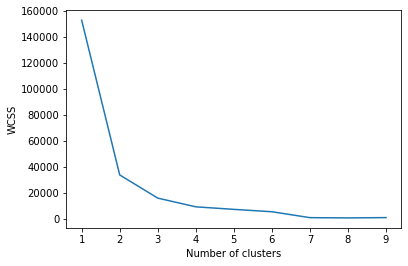

In [278]:
plt.plot(K, k_values)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

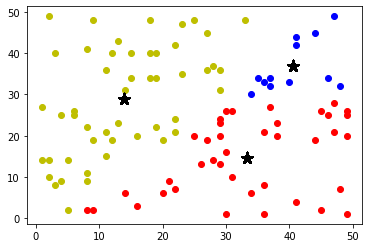

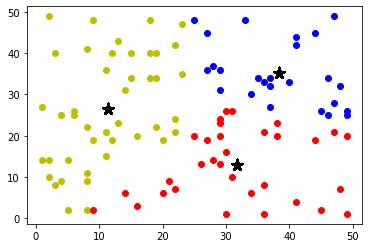

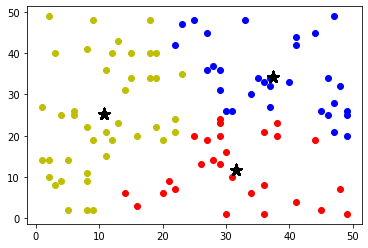

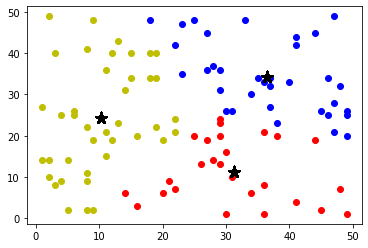

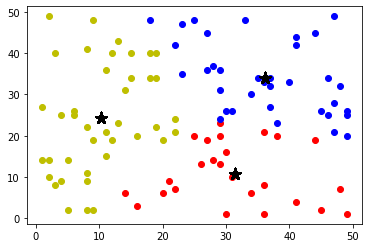

In [279]:
k=3
changed = False
while not changed:
    new_cluster = clust(x, y, center_of_mass[0], center_of_mass[1],k)
    if np.array_equal(new_cluster, cluster):
        change = True
        break

    cluster = new_cluster

    center_of_mass = calculate_center_of_mass(cluster, x, y,k)

    colors= ['r','b','y','o','p']
    
     